In [2]:
import sys
import pandas as pd
import numpy as np
np.random.seed(1423)
import matplotlib
%matplotlib inline
from matplotlib import pyplot as plt

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline

# import theano
# import lasagne

In [3]:
def data_spread_IFT(filename):
    filename=filename[['TIME_PERIOD', 'OBS_VALUE']]
    filename['Year'] = filename['TIME_PERIOD'].str.split('-').str[0]

    filename = filename.rename(columns={'OBS_VALUE': 'UNRATE','TIME_PERIOD': 'DATE'})
    filename['DATE'] = pd.to_datetime(filename['DATE'])
    filename = filename[(filename['DATE'].dt.year >= 1994) & (filename['DATE'].dt.year <= 2021)]
    filename['Year'] = filename['DATE'].dt.year
    filename['Quarter'] = filename['DATE'].dt.quarter
    filename = filename.groupby(['Year', 'Quarter'])['UNRATE'].mean().reset_index()
    filename['DATE'] = filename['Year'].astype(str) + '-Q' + filename['Quarter'].astype(str)
    return  filename[['DATE', 'UNRATE']]


def data_Spread_Unrate(file_name):
    file_name = file_name.rename(columns={' Unemployment Rate (%)': 'UNRATE','Year': 'DATE'})
    file_name['DATE'] = file_name['DATE'].astype(int)
    file_name = file_name[(file_name['DATE'] >= 1994) & (file_name['DATE'] <= 2021)]
    file_name['Year'] = file_name['DATE']


    years = list(range(1994, 2022))
    quarters = ['Q1', 'Q2', 'Q3', 'Q4']

    date_list = []
    for year in years:
        for quarter in quarters:
            date_list.append(str(year) + quarter)

    quarters_df = pd.DataFrame(date_list, columns=['DATE'])

    quarters_df['Year'] = quarters_df['DATE'].apply(lambda x: int(x[:4]))
    quarters_df['Quarter'] = quarters_df['DATE'].apply(lambda x: x[4:])

    file_name = pd.merge(quarters_df, file_name, on='Year', how='left')
    file_name['DATE'] = file_name['Year'].astype(str) + '-' + file_name['Quarter'].astype(str)
    return file_name[['DATE','UNRATE']]


def data_Spread_GDP(file_name):

    file_name = file_name.rename(columns={'Year': 'DATE'})
    file_name['DATE'] = file_name['DATE'].astype(int)
    file_name = file_name[(file_name['DATE'] >= 1994) & (file_name['DATE'] <= 2021)]
    file_name['Year'] = file_name['DATE']


    years = list(range(1994, 2022))
    quarters = ['Q1', 'Q2', 'Q3', 'Q4']

    date_list = []
    for year in years:
        for quarter in quarters:
            date_list.append(str(year) + quarter)

    quarters_df = pd.DataFrame(date_list, columns=['DATE'])

    quarters_df['Year'] = quarters_df['DATE'].apply(lambda x: int(x[:4]))
    quarters_df['Quarter'] = quarters_df['DATE'].apply(lambda x: x[4:])

    file_name = pd.merge(quarters_df, file_name, on='Year', how='left')
    file_name['DATE'] = file_name['Year'].astype(str) + '-' + file_name['Quarter'].astype(str)
    return file_name[['DATE','GDP']]

def clean_duplicate(filename):
    start_time = '1994-Q1'
    end_time = '2021-Q4'
    filename = filename[(filename['TIME'] >= start_time) & (filename['TIME'] <= end_time)]
    filename = filename.reset_index(drop=True)
    return filename


In [4]:
une_USA=pd.read_csv('une_USA.csv')
une_USA['DATE'] = pd.to_datetime(une_USA['DATE'])
une_USA = une_USA[(une_USA['DATE'].dt.year >= 1994) & (une_USA['DATE'].dt.year <= 2021)]
une_USA['Year'] = une_USA['DATE'].dt.year
une_USA['Quarter'] = une_USA['DATE'].dt.quarter
une_USA = une_USA.groupby(['Year', 'Quarter'])['UNRATE'].mean().reset_index()
une_USA['DATE'] = une_USA['Year'].astype(str) + '-Q' + une_USA['Quarter'].astype(str)
une_USA = une_USA[['DATE', 'UNRATE']]


une_EU=pd.read_csv('une_EU.csv')

une_FRA = une_EU[une_EU['geo'] == 'FR']
une_DEU = une_EU[une_EU['geo'] == 'DE']
une_DNK = une_EU[une_EU['geo'] == 'DK']


une_FRA = data_spread_IFT(une_FRA)
une_DEU = data_spread_IFT(une_DEU)
une_DNK = data_spread_IFT(une_DNK)
# une_EU=une_EU[['TIME_PERIOD', 'OBS_VALUE']]
# une_EU['Year'] = une_EU['TIME_PERIOD'].str.split('-').str[0]
# une_EU = une_EU.rename(columns={'OBS_VALUE': 'UNRATE','TIME_PERIOD': 'DATE'})
# une_EU['DATE'] = pd.to_datetime(une_EU['DATE'])
# une_EU = une_EU[(une_EU['DATE'].dt.year >= 1994) & (une_EU['DATE'].dt.year <= 2021)]
# une_EU['Year'] = une_EU['DATE'].dt.year
# une_EU['Quarter'] = une_EU['DATE'].dt.quarter
# une_EU = une_EU.groupby(['Year', 'Quarter'])['UNRATE'].mean().reset_index()
# une_EU['DATE'] = une_EU['Year'].astype(str) + '-Q' + une_EU['Quarter'].astype(str)
# une_EU = une_EU[['DATE', 'UNRATE']]


une_CN=pd.read_csv('china-unemployment-rate.csv')
une_CN = une_CN.drop(range(0, 15))
une_CN = une_CN.drop(une_CN.columns[3], axis=1)
une_CN.columns = une_CN.iloc[0]
une_CN = une_CN.drop(une_CN.index[0])
une_CN.reset_index(drop=True, inplace=True)
une_CN['Year'] = une_CN['date'].str.split('/').str[0]
une_CN = une_CN.drop('date', axis=1)
une_CN = une_CN[[ 'Year', ' Unemployment Rate (%)']]
une_CN = data_Spread_Unrate(une_CN)


IFT=pd.read_csv('IFT_CNEUUSA.csv')

IFT_CN = IFT[IFT['LOCATION'] == 'CHN'][[ 'TIME', 'Value']]
IFT_CN = clean_duplicate(IFT_CN)
IFT_DNK = IFT[IFT['LOCATION'] == 'DNK'][[ 'TIME', 'Value']]
IFT_DNK = clean_duplicate(IFT_DNK)
IFT_FRA = IFT[IFT['LOCATION'] == 'FRA'][[ 'TIME', 'Value']]
IFT_FRA = clean_duplicate(IFT_FRA)
IFT_DEU = IFT[IFT['LOCATION'] == 'DEU'][[ 'TIME', 'Value']]
IFT_DEU = clean_duplicate(IFT_DEU)
IFT_USA = IFT[IFT['LOCATION'] == 'USA'][[ 'TIME', 'Value']]
IFT_USA = clean_duplicate(IFT_USA)




GDP = pd.read_csv('GDP2.csv')
GDP_CN = pd.DataFrame(GDP['40'].loc[4:])
GDP_CN = GDP_CN.rename(columns={GDP_CN.columns[0]: 'GDP'})
GDP_CN.insert(0, 'Year', range(1960, 2022))

GDP_DEU	 = pd.DataFrame(GDP['55'].loc[4:])
GDP_DEU	= GDP_DEU.rename(columns={GDP_DEU	.columns[0]: 'GDP'})
GDP_DEU	.insert(0, 'Year', range(1960, 2022))

GDP_FRA = pd.DataFrame(GDP['77'].loc[4:])
GDP_FRA= GDP_FRA.rename(columns={GDP_FRA.columns[0]: 'GDP'})
GDP_FRA.insert(0, 'Year', range(1960, 2022))

GDP_DNK = pd.DataFrame(GDP['58'].loc[4:])
GDP_DNK= GDP_DNK.rename(columns={GDP_DNK.columns[0]: 'GDP'})
GDP_DNK.insert(0, 'Year', range(1960, 2022))

GDP_USA = pd.DataFrame(GDP['251'].loc[4:])
GDP_USA= GDP_USA.rename(columns={GDP_USA.columns[0]: 'GDP'})
GDP_USA.insert(0, 'Year', range(1960, 2022))

GDP_CN = data_Spread_GDP(GDP_CN)
GDP_DEU = data_Spread_GDP(GDP_DEU)
GDP_FRA = data_Spread_GDP(GDP_FRA)
GDP_DNK = data_Spread_GDP(GDP_DNK)
GDP_USA = data_Spread_GDP(GDP_USA)

c:\Users\think\anaconda3\envs\MSN\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [27]:
CN_data = pd.concat([GDP_CN, IFT_CN['Value'], une_CN['UNRATE']], axis=1)
USA_data = pd.concat([GDP_USA, IFT_USA['Value'], une_USA['UNRATE']], axis=1)
DEU_data = pd.concat([GDP_DEU, IFT_DEU['Value'], une_DEU['UNRATE']], axis=1)
DNK_data = pd.concat([GDP_DNK, IFT_DNK['Value'], une_DNK['UNRATE']], axis=1)
FRA_data = pd.concat([GDP_FRA, IFT_FRA['Value'], une_FRA['UNRATE']], axis=1)

In [46]:
CN_data = CN_data.rename(columns={"GDP": 'CN_GDP', "Value":"CN_Value", "UNRATE":"CN_UNRATE"})
USA_data = USA_data.rename(columns={"GDP": 'USA_GDP', "Value":"USA_Value", "UNRATE":"USA_UNRATE"})
DEU_data = DEU_data.rename(columns={"GDP": 'DEU_GDP', "Value":"DEU_Value", "UNRATE":"DEU_UNRATE"})
DNK_data = DNK_data.rename(columns={"GDP": 'DNK_GDP', "Value":"DNK_Value", "UNRATE":"DNK_UNRATE"})
FRA_data = FRA_data.rename(columns={"GDP": 'FRA_GDP', "Value":"FRA_Value", "UNRATE":"FRA_UNRATE"})
CN_data['CN_UNRATE'] = pd.to_numeric(CN_data['CN_UNRATE'], errors='coerce')
CN_data['CN_Value'] = pd.to_numeric(CN_data['CN_Value'], errors='coerce')
CN_data["CN_Value_UNRATE"] = 10261 * 0.762 ** (1 - CN_data['CN_UNRATE']) * (1 + CN_data['CN_Value'])
USA_data["USA_Value_UNRATE"] = 65280 * 0.612**(1 - USA_data['USA_UNRATE']) *(1 + USA_data['USA_Value'])
FRA_data["FRA_Value_UNRATE"] = 44670 * 0.645**(1 - FRA_data['FRA_UNRATE']) *(1 + FRA_data['FRA_Value'])
df = pd.merge(CN_data, USA_data, on="DATE", how="inner")
df = pd.merge(df, DEU_data, on="DATE", how="inner")
df = pd.merge(df, DNK_data, on="DATE", how="inner")
df = pd.merge(df, FRA_data, on="DATE", how="inner")
df = df.drop("DATE", axis=1)
df
#df = pd.concat(CN_data["CN_GDP"], CN_data["CN_Value_UNRATE"], USA_data["USA_Value_UNRATE"], FRA_data["FRA_Value_UNRATE"])

,CN_GDP,CN_Value,CN_UNRATE,CN_Value_UNRATE,USA_GDP,USA_Value,USA_UNRATE,USA_Value_UNRATE,DEU_GDP,DEU_Value,DEU_UNRATE,DNK_GDP,DNK_Value,DNK_UNRATE,FRA_GDP,FRA_Value,FRA_UNRATE,FRA_Value_UNRATE
0,564325000000.0,22.236480,2.900,399618.496267,7287240000000.0,2.515723,6.566667,3.530844e+06,2205070000000.0,2.972028,8.466667,156162000000.0,1.770703,8.400000,1393980000000.0,1.698279,10.800000,8.859671e+06
1,564325000000.0,21.867150,2.900,393266.798453,7287240000000.0,2.380952,6.200000,2.836036e+06,2205070000000.0,2.772964,8.533333,156162000000.0,2.006748,7.833333,1393980000000.0,1.696392,10.766667,8.725007e+06
2,564325000000.0,25.725840,2.900,459628.136115,7287240000000.0,2.878195,6.000000,2.948850e+06,2205070000000.0,2.581756,8.433333,156162000000.0,2.091086,7.500000,1393980000000.0,1.624417,10.633333,8.009835e+06
3,564325000000.0,26.883720,2.900,479541.232439,7287240000000.0,2.652641,5.633333,2.319738e+06,2205070000000.0,2.450559,8.266667,156162000000.0,2.096916,7.200000,1393980000000.0,1.603645,10.466667,7.386393e+06
4,734548000000.0,22.583500,3.000,416761.894552,7639750000000.0,2.840264,5.466667,2.247251e+06,2585790000000.0,2.079796,8.133333,185007000000.0,2.355009,6.900000,1601090000000.0,1.760675,10.333333,7.387099e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
107,14687700000000.0,0.120048,5.000,34088.385858,21060500000000.0,1.239488,6.766667,2.481203e+06,3889670000000.0,-0.504414,3.900000,355222000000.0,0.452635,5.900000,2639010000000.0,0.076443,8.100000,1.081765e+06
108,17734100000000.0,-0.108966,4.817,25802.497263,23315100000000.0,1.898514,6.200000,2.431354e+06,4259930000000.0,1.499001,3.900000,398303000000.0,0.709906,6.100000,2957880000000.0,0.742843,8.133333,1.777248e+06
109,17734100000000.0,1.268126,4.817,65680.241206,23315100000000.0,4.848945,5.933333,4.304116e+06,4259930000000.0,2.190508,3.700000,398303000000.0,1.647819,5.033333,2957880000000.0,1.381902,8.033333,2.324716e+06
110,17734100000000.0,1.000762,4.817,57937.932353,23315100000000.0,5.335693,5.133333,3.147761e+06,4259930000000.0,3.878302,3.433333,398303000000.0,1.896496,4.733333,2957880000000.0,1.724740,7.800000,2.400684e+06


Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.


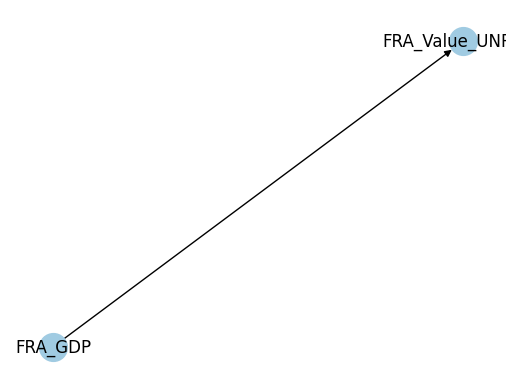

In [55]:
import cdt
from cdt import SETTINGS
SETTINGS.verbose=True
#SETTINGS.NJOBS=16
#SETTINGS.GPU=1
import networkx as nx
import matplotlib.pyplot as plt
plt.axis('off')

# Finding the structure of the graph
glasso = cdt.independence.graph.Glasso()
skeleton = glasso.predict(df[["FRA_GDP","FRA_Value_UNRATE"]])

# Pairwise setting
model = cdt.causality.pairwise.ANM()
output_graph = model.predict(df[["FRA_GDP","FRA_Value_UNRATE"]], skeleton)

# Visualize causality graph
options = {
        "node_color": "#A0CBE2",
        "width": 1,
        "node_size":400,
        "edge_cmap": plt.cm.Blues,
        "with_labels": True,
    }
nx.draw_networkx(output_graph,**options)

In [52]:
import networkx as nx
import matplotlib.pyplot as plt

G = nx.DiGraph()

# 添加因果关系边
G.add_edges_from([('CN_GDP', 'CN_Value_UNRATE',"USA_Value_UNRATE","FRA_Value_UNRATE")])

# 绘制因果关系图
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_size=3000, node_color="skyblue", font_size=14, font_weight='bold', edge_color='gray', arrowsize=20)
plt.title("Causal Relationship Graph")
plt.show()

NetworkXError: Edge tuple ('CN_GDP', 'CN_Value_UNRATE', 'USA_Value_UNRATE', 'FRA_Value_UNRATE') must be a 2-tuple or 3-tuple.

In [50]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.tsa.stattools import grangercausalitytests
gdp_adf = sm.tsa.stattools.adfuller(CN_data['CN_GDP'])
new_column_adf = sm.tsa.stattools.adfuller(CN_data['CN_Value_UNRATE'])

print("GDP ADF p-value:", gdp_adf[1])
print("New Column ADF p-value:", new_column_adf[1])

max_lag = 4
test_result = grangercausalitytests(CN_data[['CN_GDP', 'CN_Value_UNRATE']], max_lag, verbose=True)

GDP ADF p-value: 0.9937589917449631
New Column ADF p-value: 0.016870206220926977

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0113  , p=0.9157  , df_denom=108, df_num=1
ssr based chi2 test:   chi2=0.0116  , p=0.9143  , df=1
likelihood ratio test: chi2=0.0116  , p=0.9143  , df=1
parameter F test:         F=0.0113  , p=0.9157  , df_denom=108, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=0.1102  , p=0.8957  , df_denom=105, df_num=2
ssr based chi2 test:   chi2=0.2310  , p=0.8909  , df=2
likelihood ratio test: chi2=0.2307  , p=0.8910  , df=2
parameter F test:         F=0.1102  , p=0.8957  , df_denom=105, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=0.0290  , p=0.9933  , df_denom=102, df_num=3
ssr based chi2 test:   chi2=0.0930  , p=0.9927  , df=3
likelihood ratio test: chi2=0.0930  , p=0.9927  , df=3
parameter F test:         F=0.0290  , p=0.9933  , df_denom=102, df_num=3

Granger Caus

In [484]:
ift_cn = np.array(CN_data['Value']).reshape(-1,1)
une_cn = np.array(CN_data['UNRATE']).reshape(-1,1)
data_cn = np.hstack((ift_cn,une_cn))

In [486]:
def u(inflation, unrate,country):
    if country == 'cn':
        return  10261 * 0.762**(1 - float(unrate)) *(1 + float(inflation))
    if country == 'usa':
        return  65280 * 0.612**(1 - float(unrate)) *(1 + float(inflation))
    if country == 'fra':
        return  44670 * 0.645**(1 - float(unrate)) *(1 + float(inflation))
    if country == 'dnk':
        return  60170 * 0.768**(1 - float(unrate)) *(1 + float(inflation))
    if country == 'deu':
        return  50206 * 0.639**(1 - float(unrate)) *(1 + float(inflation))
Z = np.array([u(ift_cn[i],une_cn[i],'cn') for i in range(0,112)]).reshape(-1,1)

In [ ]:
#Regress X on Y using cubic regression. 
model = Pipeline([('poly', PolynomialFeatures(degree=3)),('linear', LinearRegression(fit_intercept=False))])
model = model.fit(data_cn, Z)
X_estimator = np.array([model.named_steps['linear'].coef_[0][0] + model.named_steps['linear'].coef_[0][1]*X[i] + model.named_steps['linear'].coef_[0][2]*X[i]**2 + model.named_steps['linear'].coef_[0][3]*X[i]**3 for i in range(0,112)])